# Setup

## CYNDE

In [1]:
import sys
sys.path.append('/Users/hk3user/Documents/Dev/Cynde')  
import cynde.functional as cf
import cynde.analysis_tools as at
import polars as pl
import os
import numpy as np
import openai
import tiktoken

import datamapplot
current_path = os.getcwd()

classes =pl.read_parquet(os.path.join(current_path, "saved_frames", 'Voyager_python_3_12_1_standard_lib_classes_embedded_code.parquet'))


embeddings = np.array(classes['code_voyage-code-2_embedding'].to_list())
docs = classes['code'].to_list()
ta = at.TopicAnalysis()
topics, probs = ta.fit_transform(docs, embeddings)

/Users/hk3user/Documents/Dev/Cynde


/Users/hk3user/.pyenv/versions/3.12.1/envs/pred_cst/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ta.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2463,-1_def_line_with_in,"[def, line, with, in, class, the, return, pass...","[\n\nclass Headers:\n """"""Manage a collectio..."
1,0,19,0_unicode_ranges_unicoderangelist_range,"[unicode, ranges, unicoderangelist, range, cha...","[\nclass Latin1(unicode_set):\n """"""Unicode ..."
2,1,24,1_argumentsurl_selftestopen_browser_url,"[argumentsurl, selftestopen, browser, url, rem...",[\n\nclass CommandTestMixin:\n\n def _test(...
3,2,38,2_pass_sigactionstructure_class_sfilexstructure,"[pass, sigactionstructure, class, sfilexstruct...","[\n\nclass div_t(Structure):\n pass\n, \n\n..."
4,3,34,3_retrystate_retrycallstate_callself_strategy,"[retrystate, retrycallstate, callself, strateg...","[\n\nclass wait_fixed(wait_base):\n """"""Wait..."
...,...,...,...,...,...
287,286,17,286_methself_meth1self_meth2self_cobject,"[methself, meth1self, meth2self, cobject, xsel...",[\nclass C1:\n def meth1(self):\n pa...
288,287,28,287_bobject_pass_aregister_coerced,"[bobject, pass, aregister, coerced, subclasses...","[class B:\n pass\n, \nclass C(A):\n pass..."
289,288,18,288_dobject_pass_d2d1_dparamspecargs,"[dobject, pass, d2d1, dparamspecargs, ctypesel...","[\nclass D(A):\n pass\n, \nclass D:\n pa..."
290,289,14,289_classvar_tcv4_initvar_typingclassvarint,"[classvar, tcv4, initvar, typingclassvarint, c...",[\n\n@dataclass\nclass IV:\n T_IV4 = InitVa...


In [3]:
hierarchical_topics = ta.hierarchical_topics(docs)

  0%|          | 0/290 [00:00<?, ?it/s]/Users/hk3user/Documents/Dev/Cynde/cynde/analysis_tools/topic_analysis.py:873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection.Topic = 0
/Users/hk3user/Documents/Dev/Cynde/cynde/analysis_tools/topic_analysis.py:873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection.Topic = 0
/Users/hk3user/Documents/Dev/Cynde/cynde/analysis_tools/topic_analysis.py:873: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [5]:
tree = ta.get_topic_tree(hierarchical_topics)
print(tree)

.
├─class_pass_int_str_mock
│    ├─formattedexc_pass_foounittesttestcase_class_suite
│    │    ├─formattedexc_foounittesttestcase_suite_test1self_testcase
│    │    │    ├─testnothingself_testabletestunittesttestcase_classmethod_setupclasscls_teardownclasscls
│    │    │    │    ├─■──testnothingself_testabletestunittesttestcase_orderingappendtest_orderingappendsetupclass_orderingapp ── Topic: 67
│    │    │    │    └─■──testoneself_testtwoself_teardownclasscls_classmethod_testunittesttestcase ── Topic: 66
│    │    │    └─formattedexc_foounittesttestcase_suite_test1self_testcase
│    │    │         ├─formattedexc_foounittesttestcase_suite_testcase_test1self
│    │    │         │    ├─■──formattedexc_suite_testcase_foounittesttestcase_unittesttestresult ── Topic: 83
│    │    │         │    └─foounittesttestcase_test1self_unittestexpectedfailure_testfooself_pass
│    │    │         │         ├─■──foounittesttestcase_test1self_unittestexpectedfailure_pass_test2self ── Topic: 65
│    │   

In [4]:
hierarchical_topics

,Parent_ID,Parent_Name,Topics,Child_Left_ID,Child_Left_Name,Child_Right_ID,Child_Right_Name,Distance
299,600,if_def_the_in_for,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",597,if_the_to_is_not,599,class_selfassertraisestypeerror_pass_def_int,2.103528
298,599,class_selfassertraisestypeerror_pass_def_int,"[0, 1, 2, 3, 5, 9, 10, 11, 12, 13, 14, 15, 16,...",598,selfassertraisestypeerror_class_def_with_int,565,pass_class_bytesself_aobject_mystrstr,1.806727
297,598,selfassertraisestypeerror_class_def_with_int,"[1, 2, 3, 9, 10, 11, 12, 14, 15, 16, 17, 19, 2...",596,selfassertraisestypeerror_class_size_with_def,595,yield_other_g2_gen_g1,1.592151
296,597,if_the_to_is_not,"[4, 6, 7, 8, 18, 22, 25, 29, 32, 40, 44, 48, 5...",593,if_the_to_and_is,583,await_async_transport_loop_lock,1.534010
295,596,selfassertraisestypeerror_class_size_with_def,"[1, 2, 3, 9, 10, 11, 12, 14, 15, 16, 17, 20, 2...",435,cint_fields_xstructure_cbyte_cshort,594,selfassertraisestypeerror_class_size_with_int,1.528770
...,...,...,...,...,...,...,...,...
4,305,read_size_pos_selfclosed_selfsizeread,"[160, 161]",161,pos_read_raw_selfclosed_abstractmethod,160,selfsizeread_selfmode_selfchunksize_mode_file,0.577013
3,304,eqself_hashself_other_hash_dclear,"[267, 268]",267,eqself_hashself_other_hashkeycrasher_hash,268,hashself_eqself_dclear_seg_hashx,0.568697
2,303,lenself_zobject_sizeofpyssizet_sizeoflong_pyse...,"[218, 219]",218,lenself_zobject_sizeofpyssizet_sizeoflong_pyse...,219,lenself_invalidlen_nolenmethodobject_negativel...,0.513130
1,302,cint_fields_xstructure_cshort_cdouble,"[131, 143]",143,fields_cint_xstructure_cshort_cbyte,131,cint_fields_cchar_cdouble_cbyte,0.419616


## BERTOPIC

In [6]:
from bertopic.representation import OpenAI, MaximalMarginalRelevance
from bertopic import BERTopic
# Tokenizer
tokenizer= tiktoken.encoding_for_model("gpt-3.5-turbo")
openaisecret="sk-"
# Create your representation model
client = openai.OpenAI(api_key=openaisecret)
openai_generator = OpenAI(
    client,
    model="gpt-3.5-turbo", 
    delay_in_seconds=2, 
    chat=True,
    nr_docs=7,
    doc_length=1000,
    tokenizer=tokenizer
)
mmr = MaximalMarginalRelevance(diversity=0.3)
representation_models = [mmr, openai_generator]
topic_model = BERTopic(representation_model=representation_models)
topics, probs = topic_model.fit_transform(docs, embeddings)
df = topic_model.get_topic_info()



In [ ]:
new_topics = topic_model.reduce_outliers(docs, topics, probabilities=probs, strategy="probabilities")
topic_id = df['Topic'].to_list()
topic_name = df['Representation'].to_list()
topic_dict = {topic_id[i]: topic_name[i] for i in range(len(topic_id))}
doc_labels = []
for t in new_topics:
    doc_labels.append(topic_dict[t][0])
doc_labels = np.array(doc_labels, dtype=object)

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
tree = topic_model.get_topic_tree(hierarchical_topics)
print(tree)

In [55]:
cluster_frame = pl.read_parquet("/Users/hk3user/Documents/Dev/PredCST/cluster_frame.parquet")
doc_labels_frame = pl.read_parquet("/Users/hk3user/Documents/Dev/PredCST/cluster_frame_labels.parquet")

In [56]:
cluster_frame

cluster_assignment,indexes,documents,cluster_size_in_tokens,cluster_count,cluster_names
i64,list[i64],list[str],i64,u32,str
0,"[7, 83, … 849]","[""This code snippet defines a custom class `FlagFromChar` which inherits from `IntFlag`. It contains a method `__new__` which takes a character `c` as input, calculates a flag value based on the bitwise left shift of `c`, and initializes the object with this value. Additionally, it defines a variable `a` which stores the Unicode code point of the character 'a' using the `ord()` function."", ""The given code snippet declares a class named `TestAutoNumber` that inherits from `AutoNumberedEnum`. Inside the class, three enum members are defined: `a` with an unspecified value (`...`), `b` with a value of 3, and `c` with an unspecified value (`...`). The unspecified values might be assigned dynamically at runtime."", … ""This code defines a custom enum class called `IntEnum` that inherits from both `int` and `ReprEnum`. The purpose of this enum is to enforce that its members are integers. The `ReprEnum` class is not shown in the provided code snippet, so it may contain additional functionality related to representing enum values.""]",1721,22,"""Enumeration Cl…"
1,"[4, 42, … 993]","[""This code defines a class named `HelpFormatter`, which serves as an abstract base class for formatting option help in an option parser. It includes methods for setting the parser, formatting usage, heading, descriptions, and options. The class also provides functionality for handling default values, indenting text, and formatting various aspects of option help output."", ""This code defines a custom action class `_AppendConstAction` that subclasses `Action`. The `__init__` method initializes the action with parameters like option strings, destination, const, default value, etc. The `__call__` method is invoked when the action is triggered during argument parsing. It gets the current value of the specified destination attribute from the namespace, makes a copy of the items, appends the constant value specified in the action, and then sets the modified items back to the namespace under the specified destination attribute."", … ""The code defines a test class `TestExtendAddTypes` that extends `BaseTest'`. Inside the class, a custom option parser `InterceptingOptionParser` is created with specific options defined by the `setUp` method. The class also defines a custom option class `MyOption` that extends `Option`. This class adds functionality for handling file types within the parser. The `tearDown` method is used to clean up temporary files or directories created during testing. The test methods `test_filetype_ok`, `test_filetype_noexist`, and `test_filetype_notfile` test the behavior of the custom file type handling in the parser by checking for existence and type of files passed as arguments. Overall, the code sets up a testing environment for parsing file types in the command line arguments using a custom option parser. It then tests the behavior of the parser for existing files, non-existing files, and non-regular files.""]",2377,22,"""Command-line a…"
4,"[8, 55, … 998]","[""The code defines a test class `StyleTest` that inherits from `AbstractTkTest` and `unittest.TestCase`. The class contains multiple test methods that test the configuration and customization of styles in a Tkinter application using the `ttk.Style` class. The tests cover configuration, mapping, lookup, layout, theme usage, element creation, and theme creation. The tests validate various aspects of styles such as colors, images, layouts, and themes. The tests use subtests, assertions, and error checking to ensure correct behavior and raise exceptions when necessary. Overall, the code focuses on testing the functionalities related to styling in a Tkinter application using the `ttk` module."", ""This code defines a `Textbox` class that represents an editing widget using a window object. The class provides several Emacs-like key bindings for tex

In [ ]:
doc_labels_frame = doc_labels_frame.rename({'content':'summary'})

In [35]:

doc_labels_frame = doc_labels_frame.unnest('choices').rename({'content':'label'}).drop(['role', 'usage', 'results', 'messages'])

In [38]:
items = []
for row in cluster_frame.iter_rows():
    cl_id = row[0]
    indexes = row[1]
    for ind in indexes:
        items.append({'cluster_id': cl_id, 'index': ind})


In [39]:
items = sorted(items, key=lambda x: x['index'])


In [45]:
doc_labels_frame


type,code,cst_tree,file_name,modules,version,license,code_token_len,cst_tree_token_len,code_voyage-code-2_embedding,summary,label
str,str,str,str,str,str,str,i64,i64,list[f64],str,str
"""class""",""" class Module(…","""ClassDef( …","""./repo_list/st…","""test/test_unit…","""3.12.1""","""Python Softwar…",28,1018,"[-0.013835, 0.005612, … -0.026541]","""This code defi…","""Error handling…"
"""class""",""" @support.req…","""ClassDef( …","""./repo_list/st…","""test/test_zipi…","""3.12.1""","""Python Softwar…",27,726,"[0.001195, 0.032903, … -0.028906]","""The code defin…","""Test case hier…"
"""class""",""" class InertP…","""ClassDef( …","""./repo_list/st…","""test/test_clin…","""3.12.1""","""Python Softwar…",28,1270,"[-0.022984, 0.018202, … -0.050671]","""The provided c…","""Unimplemented …"
"""class""",""" class OKClass…","""ClassDef( …","""./repo_list/st…","""test/test_typi…","""3.12.1""","""Python Softwar…",8,292,"[-0.015876, -0.00065, … -0.020146]","""This code defi…","""Empty Class"""
"""class""",""" class HelpFo…","""ClassDef( …","""./repo_list/st…","""optparse.py""","""3.12.1""","""Python Softwar…",1717,40130,"[-0.024437, 0.04399, … -0.048538]","""This code defi…","""Option help fo…"
…,…,…,…,…,…,…,…,…,…,…,…
"""class""",""" class ZoneIn…","""ClassDef( …","""./repo_list/st…","""test/test_zone…","""3.12.1""","""Python Softwar…",2258,77867,"[-0.008098, 0.000225, … -0.003978]","""This code defi…","""Unit Testing Z…"
"""class""",""" class SubErro…","""ClassDef( …","""./repo_list/st…","""test/test_exce…","""3.12.1""","""Python Softwar…",9,393,"[-0.016899, 0.012632, … -0.020245]","""This code defi…","""Custom Excepti…"
"""class""",""" # Add default…","""ClassDef( …","""./repo_list/st…","""site-packages/…","""3.12.1""","""Python Softwar…",114,3204,"[-0.025801, -0.005258, … -0.034766]","""The code defin…","""TypeVarTuple c…"


# Heirarchy

## Example 1

In [9]:
import numpy as np 
from scipy.cluster import hierarchy 
from scipy.spatial.distance import pdist
import pandas as pd

In [48]:
clusters = [item['cluster_id'] for item in items]
labels = doc_labels_frame['label'].to_list()
embeddings = np.array(doc_labels_frame['code_voyage-code-2_embedding'].to_list())

#### Create a feature matrix

In [49]:
features = embeddings @ embeddings.T

#### Calculate the condensed distance matrix

In [50]:
distance_matrix = pdist(features)

#### Perform hierarchical clustering


In [51]:
linkage_matrix = hierarchy.linkage(distance_matrix, method='ward')

#### Print the linkage matrix

In [52]:
print("Linkage Matrix:")
print(linkage_matrix)

Linkage Matrix:
[[5.98000000e+02 8.47000000e+02 1.16784713e-01 2.00000000e+00]
 [2.49000000e+02 2.55000000e+02 2.15468039e-01 2.00000000e+00]
 [2.90000000e+02 5.95000000e+02 2.27141951e-01 2.00000000e+00]
 ...
 [1.99400000e+03 1.99500000e+03 1.56793737e+01 4.77000000e+02]
 [1.98900000e+03 1.99600000e+03 2.13626329e+01 6.64000000e+02]
 [1.99200000e+03 1.99700000e+03 2.88629306e+01 1.00000000e+03]]


#### Create a dictionary to map cluster labels to topic names

In [58]:
cluster_frame.head(1)

cluster_assignment,indexes,documents,cluster_size_in_tokens,cluster_count,cluster_names
i64,list[i64],list[str],i64,u32,str
0,"[7, 83, … 849]","[""This code snippet defines a custom class `FlagFromChar` which inherits from `IntFlag`. It contains a method `__new__` which takes a character `c` as input, calculates a flag value based on the bitwise left shift of `c`, and initializes the object with this value. Additionally, it defines a variable `a` which stores the Unicode code point of the character 'a' using the `ord()` function."", ""The given code snippet declares a class named `TestAutoNumber` that inherits from `AutoNumberedEnum`. Inside the class, three enum members are defined: `a` with an unspecified value (`...`), `b` with a value of 3, and `c` with an unspecified value (`...`). The unspecified values might be assigned dynamically at runtime."", … ""This code defines a custom enum class called `IntEnum` that inherits from both `int` and `ReprEnum`. The purpose of this enum is to enforce that its members are integers. The `ReprEnum` class is not shown in the provided code snippet, so it may contain additional functionality related to representing enum values.""]",1721,22,"""Enumeration Cl…"


In [59]:
ca = cluster_frame['cluster_assignment'].to_list()
cn = cluster_frame['cluster_names'].to_list()
topic_names = {a:n for a, n in zip(ca, cn)}

#### Print the cluster hierarchy


Cluster Hierarchy:


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [122.5, 122.5, 152.5, 152.5],
  [83.75, 83.75, 137.5, 137.5],
  [28.125, 28.125, 110.625, 110.625],
  [175.0, 175.0, 185.0, 185.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [195.0, 195.0, 213.75, 213.75],
  [180.0, 180.0, 204.375, 204.375],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [252.5, 252.5, 280.0, 280.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 3

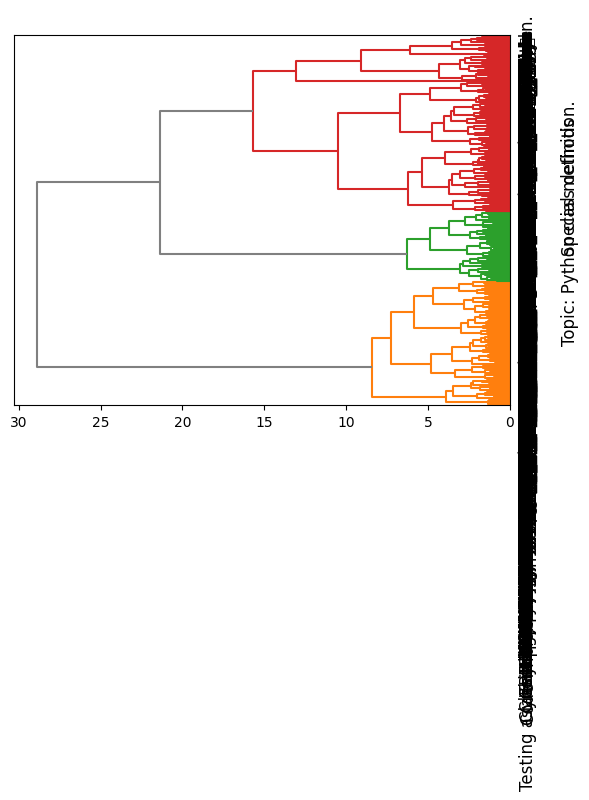

In [61]:
print("Cluster Hierarchy:")
hierarchy.dendrogram(linkage_matrix, labels=labels, leaf_rotation=90, leaf_font_size=12,
color_threshold=0.7*max(linkage_matrix[:,2]),
above_threshold_color='grey', orientation='left')

#### Create a dataframe to store the hierarchy information

In [62]:
hierarchy_df = pd.DataFrame(columns=['parent_id', 'parent_name', 'child_left_id', 'child_left_name',
'child_right_id', 'child_right_name', 'distance'])

#### Traverse the linkage matrix and build the hierarchy dataframe


In [63]:
for i, merge in enumerate(linkage_matrix):
    parent_id = i + len(labels)
    parent_name = f"Cluster {parent_id}"
    child_left_id = int(merge[0])
    child_left_name = labels[child_left_id] if child_left_id < len(labels) else hierarchy_df.loc[child_left_id - len(labels), 'parent_name']

    child_right_id = int(merge[1])
    child_right_name = labels[child_right_id] if child_right_id < len(labels) else hierarchy_df.loc[child_right_id - len(labels), 'parent_name']

    distance = merge[2]

    hierarchy_df.loc[i] = [parent_id, parent_name, child_left_id, child_left_name, child_right_id, child_right_name, distance]




In [82]:
print("Hierarchy Dataframe:")
hierarchy_df

Hierarchy Dataframe:


,parent_id,parent_name,child_left_id,child_left_name,child_right_id,child_right_name,distance
0,1000,Cluster 1000,598,Custom Timezone Class,847,Custom Timezone Class,0.116785
1,1001,Cluster 1001,249,Custom IMAP server authentication,255,Authentication handling,0.215468
2,1002,Cluster 1002,290,Custom Parsing Logic,595,Matching End of Word,0.227142
3,1003,Cluster 1003,621,Test class definition.,769,Testing tkinter LabelFrame configurations,0.266530
4,1004,Cluster 1004,835,Empty class definition,885,Empty class declaration,0.283777
...,...,...,...,...,...,...,...
994,1994,Cluster 1994,1988,Cluster 1988,1990,Cluster 1990,10.481533
995,1995,Cluster 1995,882,String-to-float Testing,1993,Cluster 1993,13.052716
996,1996,Cluster 1996,1994,Cluster 1994,1995,Cluster 1995,15.679374
997,1997,Cluster 1997,1989,Cluster 1989,1996,Cluster 1996,21.362633


In [83]:
def print_tree(node_id, depth=0):
    if node_id < len(labels):
        print('  ' * depth + f"- {labels[node_id]}")
    else:
        pass
        node = hierarchy_df.loc[node_id - len(labels)]
        print('  ' * depth + f"- {node['parent_name']}")
        print_tree(int(node['child_left_id']), depth + 1)
        print_tree(int(node['child_right_id']), depth + 1)

In [84]:
print("Hierarchical Tree:")
print_tree(len(labels) + len(linkage_matrix) - 1)

Hierarchical Tree:
- Cluster 1998
  - Cluster 1992
    - Cluster 1976
      - Cluster 1804
        - Cluster 1698
          - Cluster 1155
            - Unit Test with Python unittest
            - Cluster 1010
              - Unit Testing with Unittest
              - Python unit testing
          - Cluster 1537
            - Unit Testing Setup
            - Cluster 1446
              - Asynchronous test setup
              - Cluster 1285
                - Custom Test Suite类
                - Module cleanup functions.
        - Cluster 1787
          - Cluster 1473
            - Class Inheritance
            - Cluster 1352
              - Error handling
              - Cluster 1029
                - Unit Testing

                - Unit Testing with Errors
          - Cluster 1697
            - Cluster 1153
              - Testing Framework_ERRORS
              - Cluster 1011
                - Inheritance and Method Override
                - Inheritance and Error Handling
            